In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split

/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Lendo csv
df = pd.read_csv("casos_attr_2015.csv")

In [3]:
df = df.dropna(axis=1, how='any')

In [4]:
# df.columns.to_series().groupby(df.dtypes).groups

In [5]:
# removendo colunas do tipo textual
string_columns = [u'applicant', u'concept:name', u'application', u'department',
                  u'start_time', u'identity:id', u'end_time']
df = df.drop(string_columns, axis=1)

# # convertando booleanos para inteiros
# bool_columns = [u'penalty_AGP', u'penalty_BGK', u'penalty_AVJLP', u'penalty_BGP',
#                 u'basic payment', u'penalty_AJLP', u'greening', u'penalty_AVGP',
#                 u'penalty_C16', u'penalty_B16', u'penalty_AVBP', u'selected_manually',
#                 u'penalty_C9', u'penalty_C4', u'penalty_B5', u'selected_random',
#                 u'penalty_AUVP', u'penalty_AVUVP', u'rejected', u'penalty_V5',
#                 u'penalty_BGKV', u'penalty_B5F', u'selected_risk', u'penalty_GP1',
#                 u'small farmer', u'penalty_CC', u'penalty_JLP5', u'penalty_JLP6',
#                 u'penalty_JLP7', u'penalty_JLP1', u'penalty_JLP2', u'penalty_JLP3',
#                 u'penalty_ABP', u'penalty_B6', u'penalty_B4', u'redistribution',
#                 u'penalty_B2', u'penalty_B3', u'young farmer']
# df[bool_columns] *= 1

In [6]:
df.shape

(14750, 51)

In [7]:
cols = list(df.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('finish payment')) #Remove b from list
df = df[cols + ['finish payment']]
df

,program-id,penalty_AGP,penalty_BGK,penalty_AVJLP,year,penalty_BGP,basic payment,penalty_AJLP,greening,penalty_AVGP,...,payment_actual0,penalty_ABP,penalty_B6,penalty_B4,redistribution,penalty_B2,penalty_B3,number_parcels,young farmer,finish payment
0,215,False,False,False,2015,False,True,False,True,False,...,2371.74,False,False,False,True,False,False,5,False,1
1,215,False,False,False,2015,False,True,False,True,False,...,36832.46,False,False,False,True,True,False,32,False,0
2,215,False,False,False,2015,False,True,False,True,False,...,1438.85,False,False,False,True,False,False,3,False,1
3,215,False,False,False,2015,False,True,False,True,False,...,16426.15,False,False,False,True,True,False,33,False,0
4,215,False,False,False,2015,False,True,False,True,False,...,7295.47,False,False,False,True,True,False,9,False,1
5,215,False,False,False,2015,False,True,False,True,False,...,40302.36,False,False,False,True,True,False,44,False,0
6,215,False,False,False,2015,False,True,False,True,False,...,47397.74,False,False,False,True,True,False,21,False,0
7,215,False,False,False,2015,False,True,False,True,False,...,23743.47,False,False,False,True,True,False,27,False,0
8,215,False,False,False,2015,False,True,False,True,False,...,2274.76,False,False,False,True,False,False,7,False,1
9,215,False,False,False,2015,False,True,False,True,False,...,23356.54,False,False,False,True,False,False,31,False,0


In [11]:
# Copiando os dados do csv
data = df.values.copy()

# Separando atributos de classes
x = data[:, :-1]  # x tem apenas valores entre a primeira e penúltima coluna
y = data[:, -1]  # y tem os valores da última coluna
y = [1 if i else 0 for i in y]

# 70% dos dados serão utilizados para treinamento e 30% para o teste
# A divisão será estratificada, serão mantidas as proporções de spam e não spam em cada grupo
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, train_size=0.7, stratify=y)

In [12]:
x_treino.shape

(10325, 50)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Classificando com uma floresta árvores de decisão
cls_rf = RandomForestClassifier(n_estimators=100)
cls_rf.fit(x_treino, y_treino)
y_pred_rf = cls_rf.predict(x_teste)

print "Floresta árvores de decisão"
print classification_report(y_pred_rf, y_teste)

Floresta árvores de decisão
             precision    recall  f1-score   support

          0       0.93      0.88      0.90      1940
          1       0.91      0.95      0.93      2485

avg / total       0.92      0.92      0.92      4425



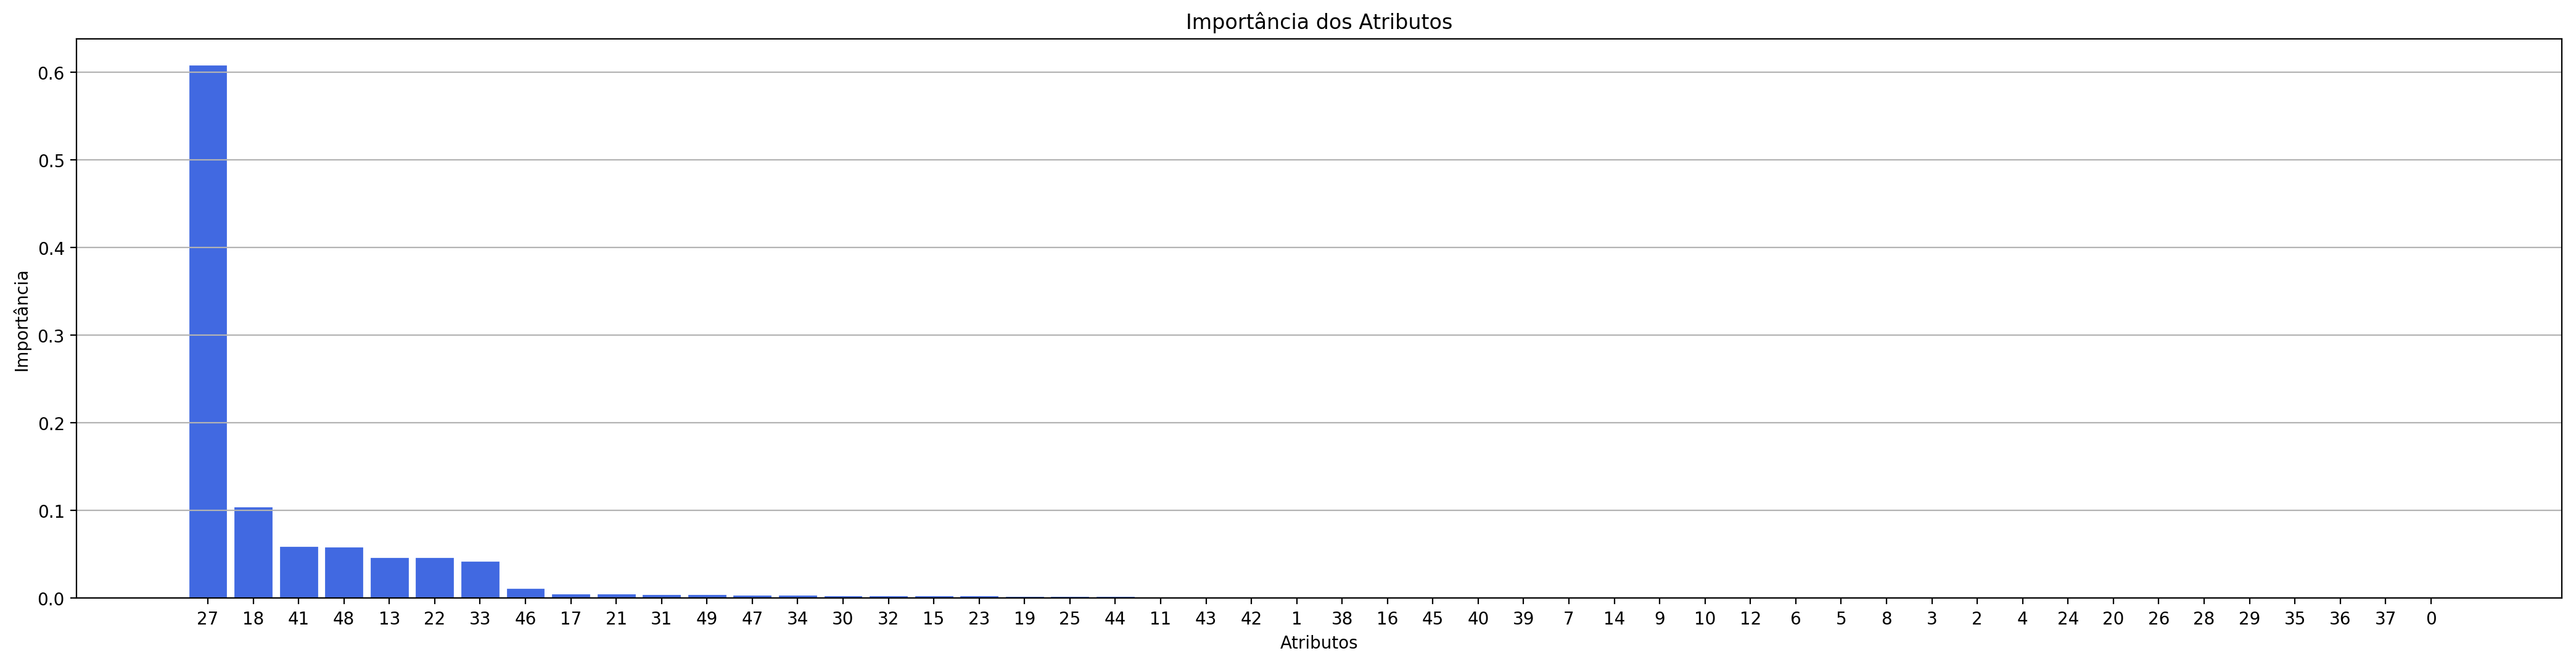

In [19]:
importances = cls_rf.feature_importances_
indices =  np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(26, 6), dpi=200)
plt.title(u"Importância dos Atributos")
plt.grid(b=True, which='both', color='0.7',linestyle='-', axis='y')
plt.xticks(range(len(indices)), indices)
plt.bar(range(len(indices)), importances[indices], color="#4169E1", align="center",edgecolor="#4169E1")
plt.xlabel(u"Atributos")
plt.ylabel(u"Importância")
plt.show()

In [28]:
colunas = list(df.columns.values)
for i in indices[:20]:
    print i, colunas[i]

27 delta_time
18 tot_events
41 payment_actual0
48 number_parcels
13 area
22 amount_applied0
33 penalty_amount0
46 penalty_B2
17 cross_compliance
21 selected_random
31 penalty_GP1
49 young farmer
47 penalty_B3
34 penalty_CC
30 selected_risk
32 small farmer
15 selected_manually
23 penalty_AUVP
19 penalty_C4
25 rejected
